# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import re
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Anual population data from Wikipedia
population = pd.read_html("assets/Démographie de l'Île-de-France - Wikipédia.html")[5][0:-1]
population = (population.T.reset_index(level=0, drop=True)
                          .T.set_index('Année').T
                          .loc['Île-de-France', '2000':'2020']
                          .str.replace(' ', '')
                          .str.replace('\xa0', '')
                          .astype(float))
population.index = population.index.astype(int)
population

Année
2000    11020246.0
2001    11100523.0
2002    11176008.0
2003    11250617.0
2004    11319972.0
2005    11399319.0
2006    11532398.0
2007    11598866.0
2008    11659260.0
2009    11728240.0
2010    11786234.0
2011    11852851.0
2012    11898502.0
2013    11959807.0
2014    12027565.0
2015    12082144.0
2016    12117132.0
2017    12174880.0
2018    12213447.0
2019    12262544.0
2020    12271794.0
Name: Île-de-France, dtype: float64

In [2]:
# Trafic data from the Observatoire de la mobilité en Île-de-France (omil.fr)
trafic = pd.read_excel("assets/Trafic en Île-de-France par mode.xlsx", index_col = 0).T
trafic = trafic.astype(float)*1000000 # Trafic data was given by million people
trafic

,TRAINS,MÉTRO,TRAMWAYS,BUS,TOUS MODES
2000,1.045260e+09,1.248000e+09,24500000.0,1.149500e+09,3.467260e+09
2001,1.072210e+09,1.262000e+09,36200000.0,1.156700e+09,3.527110e+09
2002,1.086870e+09,1.283000e+09,39100000.0,1.173000e+09,3.581970e+09
2003,1.089670e+09,1.247900e+09,38700000.0,1.174200e+09,3.550470e+09
2004,1.163260e+09,1.336000e+09,44100000.0,1.212600e+09,3.755960e+09
2005,1.191810e+09,1.373000e+09,47600000.0,1.208800e+09,3.821210e+09
2006,1.225960e+09,1.410000e+09,49900000.0,1.220900e+09,3.906760e+09
2007,1.246700e+09,1.387000e+09,79780000.0,1.230400e+09,3.943880e+09
2008,1.285150e+09,1.472000e+09,97360000.0,1.291300e+09,4.145810e+09
2009,1.263130e+09,1.479000e+09,97340000.0,1.290200e+09,4.129670e+09


In [3]:
trafic_per_capita = trafic.divide(population, axis = 0)
trafic_per_capita

,TRAINS,MÉTRO,TRAMWAYS,BUS,TOUS MODES
2000,94.849062,113.246111,2.223181,104.308016,314.626370
2001,96.590944,113.688337,3.261108,104.202297,317.742687
2002,97.250288,114.799488,3.498566,104.956976,320.505318
2003,96.854244,110.918361,3.439811,104.367609,315.580026
2004,102.761738,118.021493,3.895769,107.120406,331.799407
2005,104.550982,120.445792,4.175688,106.041422,335.213884
2006,106.305731,122.264251,4.326941,105.866967,338.763889
2007,107.484645,119.580656,6.878259,106.079336,340.022895
2008,110.225692,126.251580,8.350444,110.753170,355.580886
2009,107.699877,126.105878,8.299626,110.007981,352.113361


In [4]:
percentual_trafic = trafic_per_capita.iloc[:,0:-1].divide(trafic_per_capita['TOUS MODES'], axis = 0)*100
percentual_trafic

,TRAINS,MÉTRO,TRAMWAYS,BUS
2000,30.146571,35.993840,0.706610,33.152980
2001,30.399109,35.780001,1.026336,32.794554
2002,30.342800,35.818279,1.091578,32.747343
2003,30.690866,35.147459,1.089997,33.071678
2004,30.971043,35.570134,1.174134,32.284689
2005,31.189335,35.931027,1.245679,31.633959
2006,31.380479,36.091288,1.277273,31.250960
2007,31.611002,35.168413,2.022881,31.197704
2008,30.998767,35.505727,2.348395,31.147110
2009,30.586705,35.814000,2.357089,31.242206


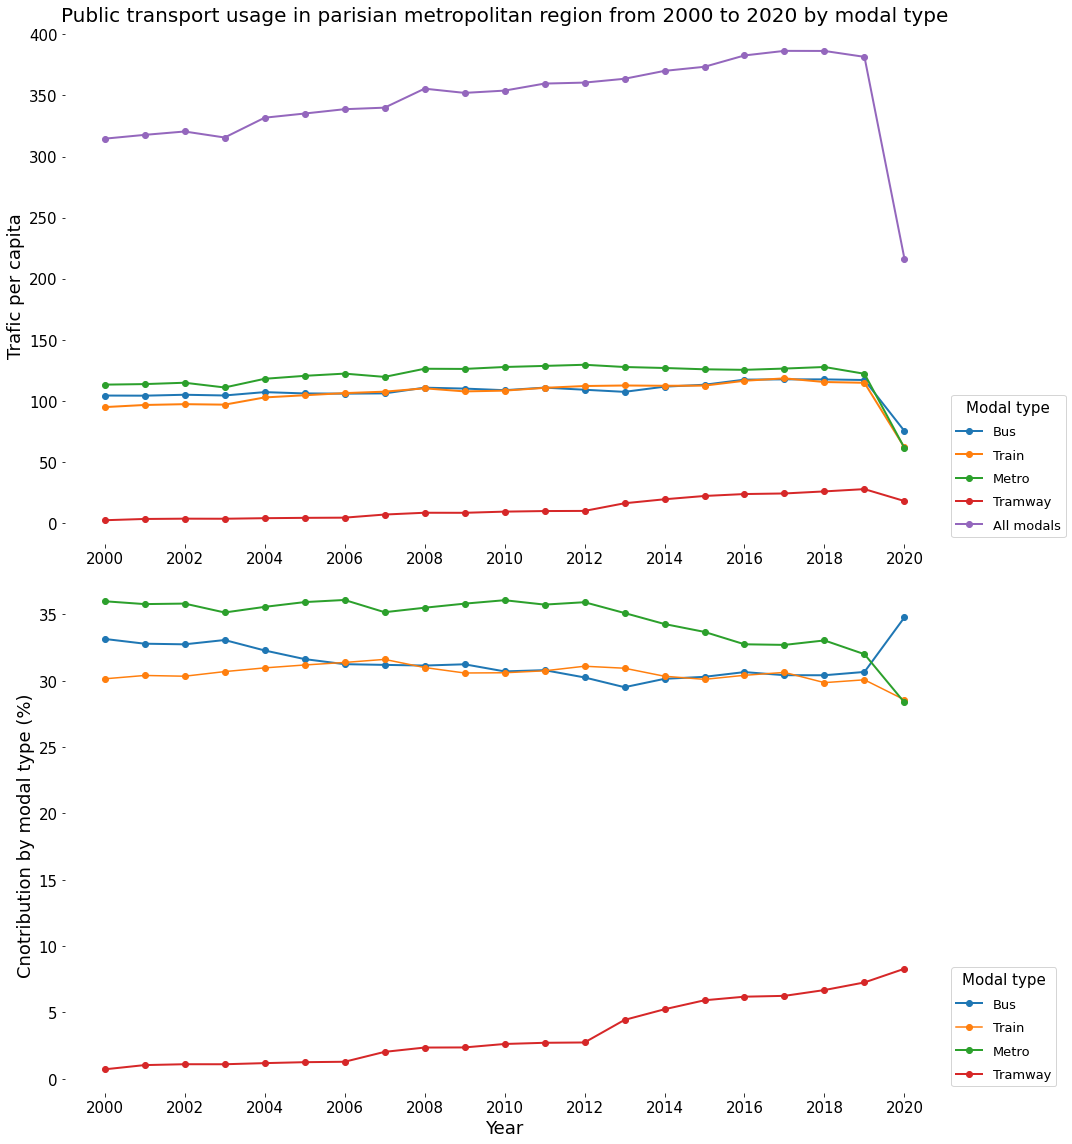

In [5]:
# Creating plots for trafic per capita over time and percentual trafic usage evolution over time
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1,figsize=(15,16), sharex = False)

axs[0].set_title('Public transport usage in parisian metropolitan region from 2000 to 2020 by modal type', fontsize=20)
axs[0].set_ylabel('Trafic per capita', fontsize=18)

axs[0].plot(trafic_per_capita.index, trafic_per_capita['BUS'], 'o-', linewidth=2, label = 'Bus')
axs[0].plot(trafic_per_capita.index, trafic_per_capita['TRAINS'], 'o-', linewidth=2, label = 'Train')
axs[0].plot(trafic_per_capita.index, trafic_per_capita['MÉTRO'], 'o-', linewidth=2, label = 'Metro')
axs[0].plot(trafic_per_capita.index, trafic_per_capita['TRAMWAYS'], 'o-', linewidth=2, label = 'Tramway')
axs[0].plot(trafic_per_capita.index, trafic_per_capita['TOUS MODES'], 'o-', linewidth=2, label = 'All modals')

legend = axs[0].legend(loc = 'lower left', bbox_to_anchor=(1, 0), title = 'Modal type', fontsize = 13, labelspacing = 0.8)
legend.get_title().set_fontsize('15')

x_ticks = [2000 + i for i in range(0,22,2)]
axs[0].xaxis.set_ticks(x_ticks)
axs[0].xaxis.set_ticklabels(x_ticks)
axs[0].tick_params(labelsize = 15)

for spine in axs[0].spines.values():
    spine.set_visible(False)

axs[1].set_xlabel('Year', fontsize=18)
axs[1].set_ylabel('Cnotribution by modal type (%)', fontsize=18)

axs[1].plot(percentual_trafic.index, percentual_trafic['BUS'], 'o-', linewidth=2, label = 'Bus')
axs[1].plot(percentual_trafic.index, percentual_trafic['TRAINS'], 'o-', label = 'Train')
axs[1].plot(percentual_trafic.index, percentual_trafic['MÉTRO'], 'o-', linewidth=2, label = 'Metro')
axs[1].plot(percentual_trafic.index, percentual_trafic['TRAMWAYS'], 'o-', linewidth=2, label = 'Tramway')

legend = axs[1].legend(loc = 'lower left', bbox_to_anchor=(1, 0), title = 'Modal type', fontsize = 13, labelspacing = 0.8)
legend.get_title().set_fontsize('15')

x_ticks = [2000 + i for i in range(0,22,2)]
axs[1].xaxis.set_ticks(x_ticks)
axs[1].xaxis.set_ticklabels(x_ticks)
axs[1].tick_params(labelsize = 15)

for spine in axs[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()
fig.savefig('Public transport usage in parisian metropolitan region from 2000 to 2020 by modal type',bbox_inches='tight',facecolor='white')